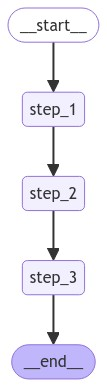

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display


class State(TypedDict):
    input: str


def step_1(state):
    print("---Step 1---")
    pass


def step_2(state):
    print("---Step 2---")
    pass


def step_3(state):
    print("---Step 3---")
    pass


builder = StateGraph(State)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)
builder.add_edge(START, "step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

# Set up memory
memory = MemorySaver()

# Add
graph = builder.compile(checkpointer=memory, interrupt_before=["step_3"])

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
# Input
initial_input = {"input": "hello world"}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread, stream_mode="values"):
    print(event)

user_approval = input("Do you want to go to Step 3? (yes/no): ")

if user_approval.lower() == "yes":
    # If approved, continue the graph execution
    for event in graph.stream(None, thread, stream_mode="values"):
        print(event)
else:
    print("Operation cancelled by user.")

{'input': 'hello world'}
---Step 1---
---Step 2---


Do you want to go to Step 3? (yes/no):  yes


---Step 3---


In [16]:
# Input
initial_input = {"input": "hello world"}

# Thread
thread = {"configurable": {"thread_id": "1"}}

graph.invoke(initial_input, thread)

---Step 1---
---Step 2---


{'input': 'hello world'}

In [17]:
thread

{'configurable': {'thread_id': '1'}}

In [19]:
graph.invoke(None, thread)

---Step 3---


In [18]:
graph.get_state(thread)

StateSnapshot(values={'input': 'hello world'}, next=('step_3',), config={'configurable': {'thread_id': '1', 'thread_ts': '1ef465c9-c3ed-601b-801a-a55e1e9b5c64'}}, metadata={'source': 'loop', 'step': 26, 'writes': None}, created_at='2024-07-20T05:55:04.407226+00:00', parent_config=None)

In [21]:
graph.get_state(thread).values

{'input': 'hello world'}

In [33]:
replay = [history for history in graph.get_state_history(thread)][2]
replay

StateSnapshot(values={'input': 'hello world'}, next=('step_2',), config={'configurable': {'thread_id': '1', 'thread_ts': '1ef4659f-9fb3-65e2-8001-6cd1122bfa25'}}, metadata={'source': 'loop', 'step': 1, 'writes': None}, created_at='2024-07-20T05:36:13.179818+00:00', parent_config=None)

In [34]:
graph.invoke(None, replay.config)

---Step 2---
---Step 3---


In [36]:
graph.update_state(replay.config,{"input":"good night"})

{'configurable': {'thread_id': '1',
  'thread_ts': '1ef465e8-192c-6e27-8002-f847aba4ee1a'}}

In [37]:
graph.invoke(None, replay.config)

---Step 2---
---Step 3---


In [39]:
[history for history in graph.get_state_history(thread)]

[StateSnapshot(values={}, next=('__start__',), config={'configurable': {'thread_id': '1', 'thread_ts': '1ef4659f-9fa6-6bdf-bfff-07818c734be9'}}, metadata={'source': 'input', 'step': -1, 'writes': {'input': 'hello world'}}, created_at='2024-07-20T05:36:13.174670+00:00', parent_config=None),
 StateSnapshot(values={'input': 'hello world'}, next=('step_1',), config={'configurable': {'thread_id': '1', 'thread_ts': '1ef4659f-9faa-6b63-8000-52a7b0d979cc'}}, metadata={'source': 'loop', 'step': 0, 'writes': None}, created_at='2024-07-20T05:36:13.176294+00:00', parent_config=None),
 StateSnapshot(values={'input': 'hello world'}, next=('step_2',), config={'configurable': {'thread_id': '1', 'thread_ts': '1ef4659f-9fb3-65e2-8001-6cd1122bfa25'}}, metadata={'source': 'loop', 'step': 1, 'writes': None}, created_at='2024-07-20T05:36:13.179818+00:00', parent_config=None),
 StateSnapshot(values={'input': 'hello world'}, next=('step_3',), config={'configurable': {'thread_id': '1', 'thread_ts': '1ef4659f-9